# PROJECT DESCRIPTION 


# Employee Attrition Analysis and Prediction


This project is to analyze employee attrition patterns in a company, identify the key factors influencing employee turnover, and build predictive models to estimate both the likelihood of attrition (classification) and the average tenure of employees (regression) to provide actionable insights that help the company reduce employee attrition rates and improve retention strategies.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

# Data Loading and Processing

In [3]:
Employeeattrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
Employeeattrition.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
Employeeattrition.T

0                       1     \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EmployeeCount                           1                       1   
EmployeeNumber                          1                       2   
EnvironmentSatisfaction                 2                       3   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                          3                       2   
JobLevel                                2                       2   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                         4                       2   
MaritalStatus                      Single                 Married   
MonthlyIncome                        5993                    5130   
MonthlyRate                         19479                   24907   
NumCompaniesWorked                      8                       1   
Over18                                  Y                       Y   
OverTime                              Yes                      No   
PercentSalaryHike                      11                      23   
PerformanceRating                       3                       4   
RelationshipSatisfaction                1                       4   
StandardHours                          80                      80   
StockOptionLevel                        0                       1   
TotalWorkingYears                       8                      10   
TrainingTimesLastYear                   0                       3   
WorkLifeBalance                         1                       3   
YearsAtCompany                          6                      10   
YearsInCurrentRole                      4                       7   
YearsSinceLastPromotion                 0                       1   
YearsWithCurrManager                    5                       7   

                                            2                       3     \
Age                                           37                      33   
Attrition                                    Yes                      No   
BusinessTravel                     Travel_Rarely       Travel_Frequently   
DailyRate                                   1373                    1392   
Department                Research & Development  Research & Development   
DistanceFromHome                               2                       3   
Education                                      2                       4   
EducationField                             Other           Life Sciences   
EmployeeCount                                  1                       1   
EmployeeNumber                                 4                       5   
EnvironmentSatisfaction                        4                       4   
Gender                                      Male                  Female   
HourlyRate                                    92                      56   
JobInvolvement                                 2                       3   
JobLevel                                       1                       1   
JobRole                    Laboratory Technician      Research Scientist   
JobSatisfaction                                3                       3   
MaritalStatus                             Single                 Married   
MonthlyIncome                               2090                    2909   
MonthlyRate                     

In [6]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
print(Employeeattrition)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   

In [7]:
Employeeattrition.shape

(1470, 35)

In [8]:
missing_Employeeattrition = Employeeattrition.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_Employeeattrition["% of Missing Values"] = round((missing_Employeeattrition["Total No. of Missing Values"]/len(Employeeattrition))*100,2)
missing_Employeeattrition

Total No. of Missing Values  % of Missing Values
Age                                                 0                  0.0
Attrition                                           0                  0.0
BusinessTravel                                      0                  0.0
DailyRate                                           0                  0.0
Department                                          0                  0.0
DistanceFromHome                                    0                  0.0
Education                                           0                  0.0
EducationField                                      0                  0.0
EmployeeCount                                       0                  0.0
EmployeeNumber                                      0                  0.0
EnvironmentSatisfaction                             0                  0.0
Gender                                              0                  0.0
HourlyRate                                          0                  0.0
JobInvolvement                                      0                  0.0
JobLevel                                            0                  0.0
JobRole                                             0                  0.0
JobSatisfaction                                     0                  0.0
MaritalStatus                                       0                  0.0
MonthlyIncome                                       0                  0.0
MonthlyRate                                         0                  0.0
NumCompaniesWorked                                  0                  0.0
Over18                                              0                  0.0
OverTime                                            0                  0.0
PercentSalaryHike                                   0                  0.0
PerformanceRating                                   0                  0.0
RelationshipSatisfaction                            0                  0.0
StandardHours                                       0                  0.0
StockOptionLevel                                    0                  0.0
TotalWorkingYears                                   0                  0.0
TrainingTimesLastYear                               0                  0.0
WorkLifeBalance                                     0                  0.0
YearsAtCompany                                      0                  0.0
YearsInCurrentRole                                  0                  0.0
YearsSinceLastPromotion                             0                  0.0
YearsWithCurrManager                                0                  0.0

# Exploratory Data Analysis

# Discriptive Statistics

In [9]:
Employeeattrition.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [10]:
cols = ["Over18","EmployeeCount","EmployeeNumber","StandardHours"]

Employeeattrition.drop(columns=cols, inplace=True)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
variables = Employeeattrition.columns

print("Variables in WA_Fn-UseC_-HR-Employee-Attrition.csv:")
for var in variables:
    print(var)

Variables in WA_Fn-UseC_-HR-Employee-Attrition.csv:
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


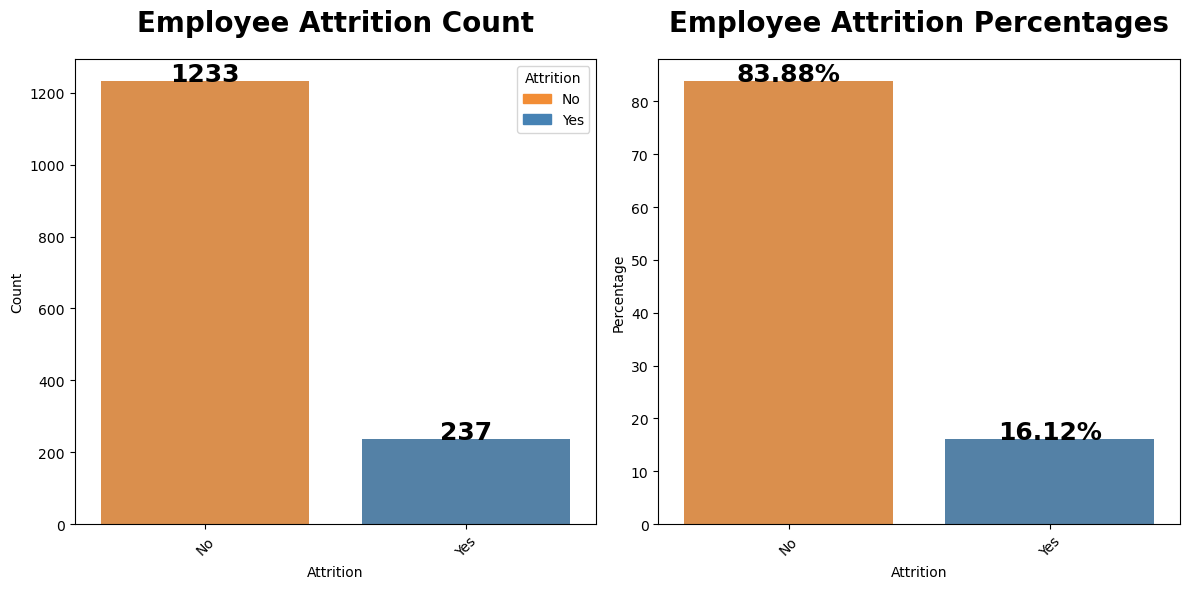

In [13]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the Attrition column is already 'Yes'/'No'
attrition_mapped = Employeeattrition['Attrition']  # Use as it is if values are already correct

plt.figure(figsize=(12, 6))

# Subplot 1: Count of Attrition
plt.subplot(1, 2, 1)
attrition_rate = attrition_mapped.value_counts()
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=["#f28d35", "#4682b4"])
plt.title("Employee Attrition Count", fontweight="black", size=20, pad=20)
plt.xlabel('Attrition')
plt.ylabel('Count')

# Add the labels above the bars
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha="center", fontweight='black', fontsize=18)

# Add custom legend with matching colors
legend_handles = [
    mpatches.Patch(color="#f28d35", label="No"),   # Orange for No
    mpatches.Patch(color="#4682b4", label="Yes")   # Blue for Yes
]
plt.legend(title='Attrition', handles=legend_handles)
plt.xticks(rotation=45)

# Subplot 2: Attrition Percentages
plt.subplot(1, 2, 2)
total_employees = len(Employeeattrition)  # Total number of employees
attrition_percentages = attrition_rate / total_employees * 100
sns.barplot(x=attrition_percentages.index, y=attrition_percentages.values, palette=["#f28d35", "#4682b4"])
plt.title("Employee Attrition Percentages", fontweight="black", size=20, pad=20)
plt.xlabel('Attrition')
plt.ylabel('Percentage')

# Add the percentage labels above the bars
for i, v in enumerate(attrition_percentages.values):
    plt.text(i, v, "{:.2f}%".format(v), ha="center", fontweight='black', fontsize=18)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


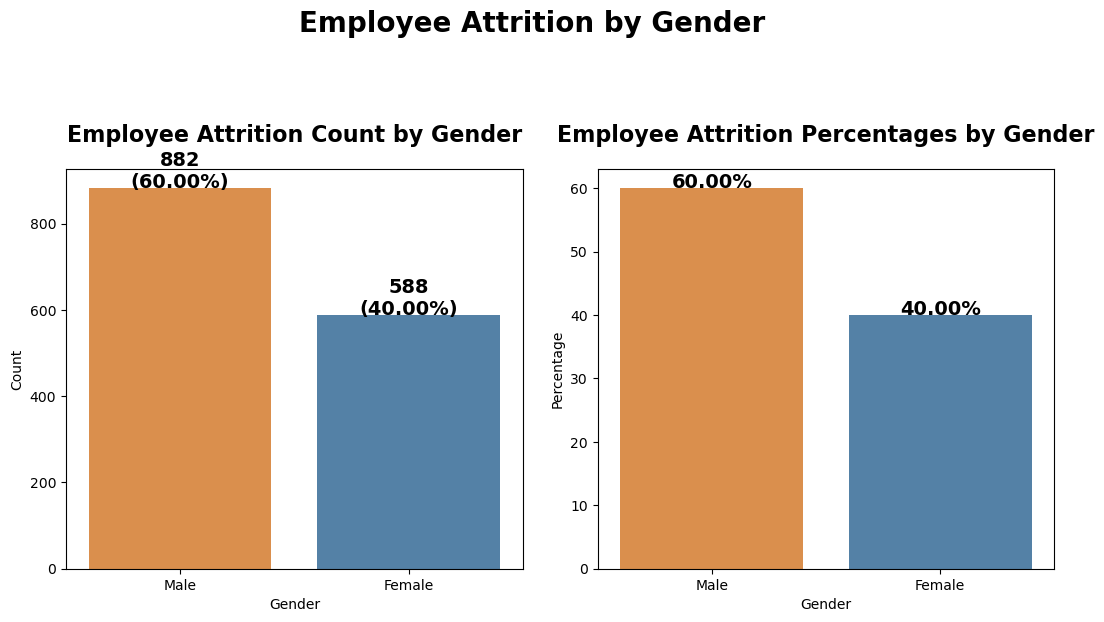

In [14]:
gender_count = Employeeattrition['Gender'].value_counts()
total_count = len(Employeeattrition)
gender_percentage = (gender_count / total_count) * 100

plt.figure(figsize=(11, 6))

# Subplot 1: Count of Attrition by Gender
plt.subplot(1, 2, 1)
sns.barplot(x=gender_count.index, y=gender_count.values, palette=["#f28d35", "#4682b4"])
plt.title("Employee Attrition Count by Gender", fontweight="black", size=16, pad=20)
plt.xlabel('Gender')
plt.ylabel('Count')

for i, (count, perc) in enumerate(zip(gender_count.values, gender_percentage.values)):
    plt.text(i, count, f'{count}\n({perc:.2f}%)', ha="center", fontweight='black', fontsize=14)

# Subplot 2: Percentage of Attrition by Gender
plt.subplot(1, 2, 2)
sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=["#f28d35", "#4682b4"])
plt.title("Employee Attrition Percentages by Gender", fontweight="black", size=16, pad=20)
plt.xlabel('Gender')
plt.ylabel('Percentage')

for i, perc in enumerate(gender_percentage.values):
    plt.text(i, perc, f'{perc:.2f}%', ha="center", fontweight='black', fontsize=14)

plt.suptitle('Employee Attrition by Gender', fontweight="black", size=20, y=1.05)  

plt.tight_layout(pad=2)  
plt.show()

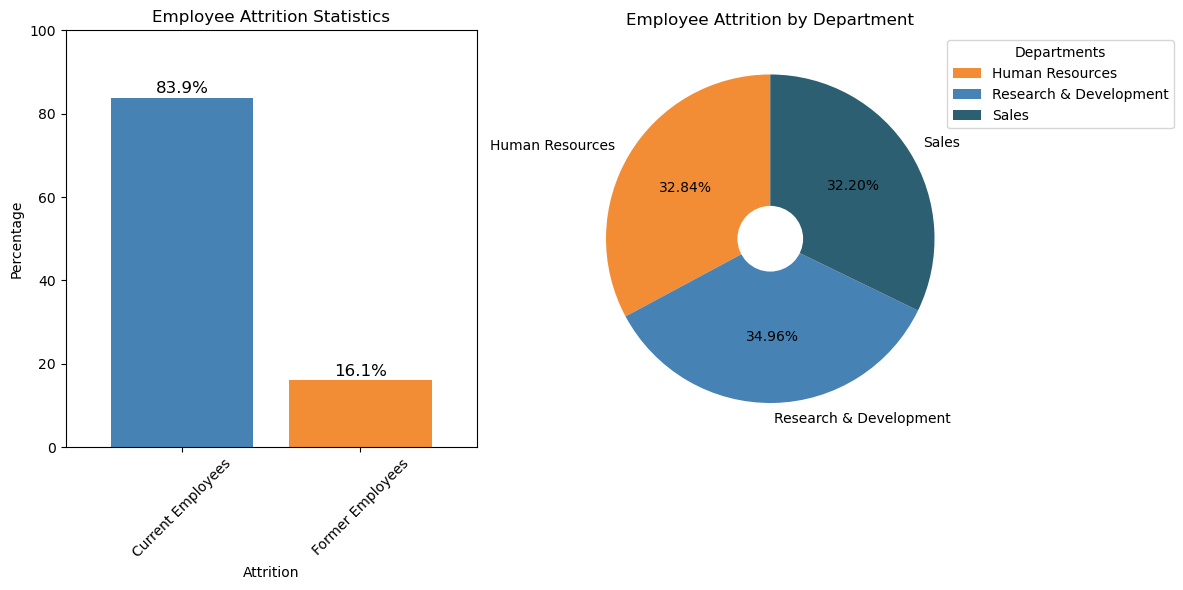

In [15]:
import matplotlib.pyplot as plt

# Calculate the overall attrition rate
attrition_counts = Employeeattrition['Attrition'].value_counts(normalize=True) * 100

# Calculate the attrition rate by department
attrition_by_department = Employeeattrition.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100

# Rename columns for clarity
attrition_by_department.columns = ['Yes', 'No']

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for overall attrition
attrition_counts.plot(kind='bar', color=["#4682b4","#f28d35"], ax=ax[0], width=0.8)
ax[0].set_title('Employee Attrition Statistics')
ax[0].set_ylabel('Percentage')
ax[0].set_xticklabels(['Current Employees', 'Former Employees'], rotation=45)
ax[0].set_ylim(0, 100)
ax[0].text(0, attrition_counts[0] + 1, f"{attrition_counts[0]:.1f}%", ha='center', color='black', fontsize=12)
ax[0].text(1, attrition_counts[1] + 1, f"{attrition_counts[1]:.1f}%", ha='center', color='black', fontsize=12)

# Donut chart (pie chart with a hole) for department-wise attrition
colors = ["#f28d35", "#4682b4", "#2d5f72"]  # Match the provided image colors
ax[1].pie(attrition_by_department['Yes'], labels=attrition_by_department.index, autopct='%1.2f%%', startangle=90, colors=colors)
# Draw a smaller circle at the center to make it a donut
center_circle = plt.Circle((0,0), 0.2, fc='white')  # Smaller hole size to match the provided image
fig.gca().add_artist(center_circle)
ax[1].set_title('Employee Attrition by Department')

# Add a legend similar to the one in the provided image
ax[1].legend(attrition_by_department.index, title="Departments", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout
plt.tight_layout()
plt.show()

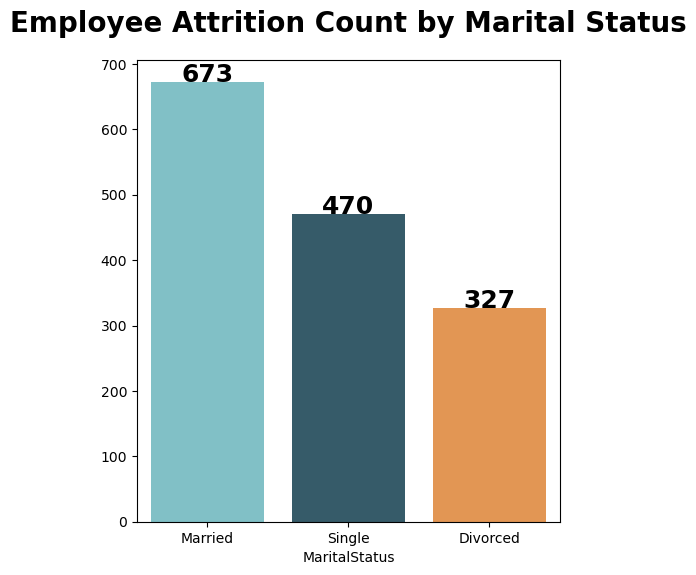

In [16]:
attrition_rate = Employeeattrition['MaritalStatus'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=["#75c9d2", "#2d5f72","#f9943d"])
plt.title("Employee Attrition Count by Marital Status", fontweight="black", size=20, pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha="center", fontweight='black', fontsize=18)

plt.show()

In [17]:
value_1 = len(Employeeattrition)
value_2 = Employeeattrition["EducationField"].value_counts()
new_Employeeattrition = Employeeattrition[Employeeattrition["Attrition"]=="Yes"]

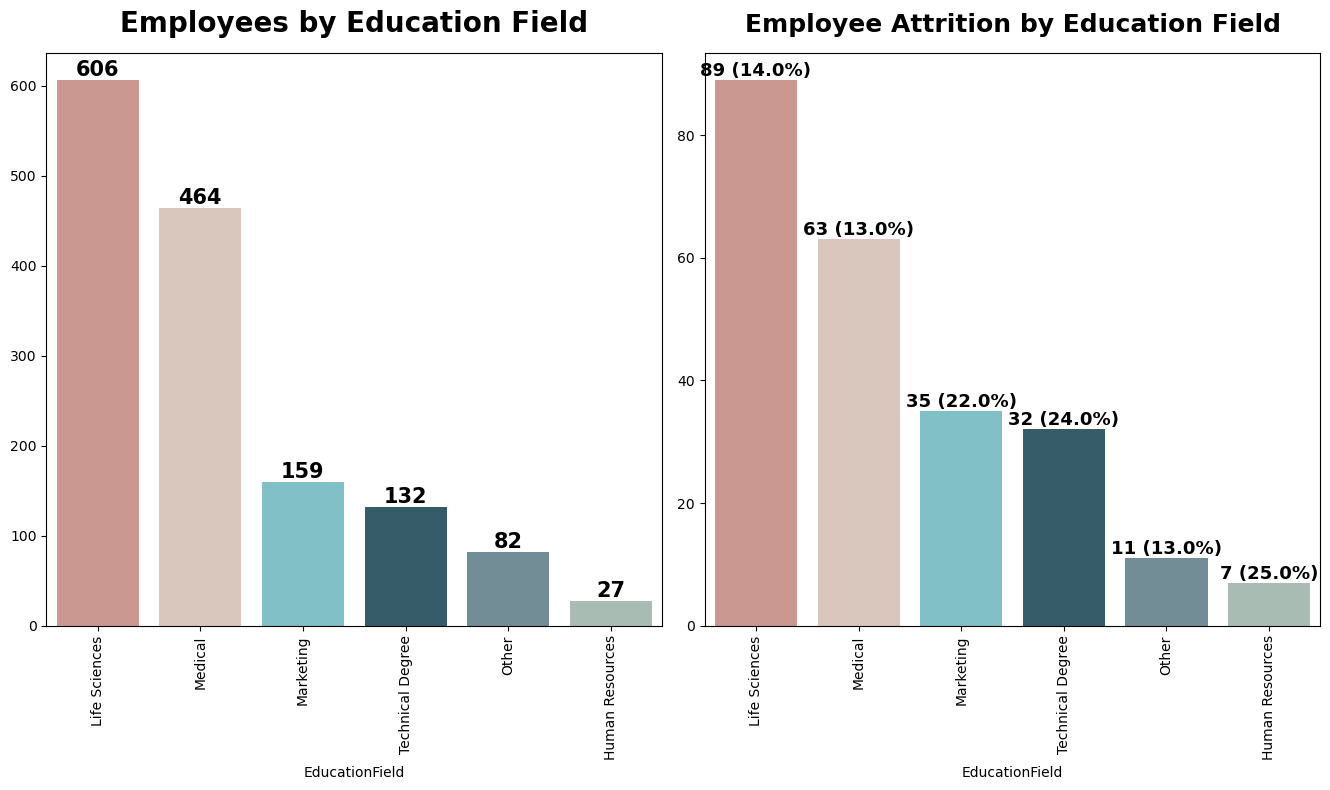

In [18]:
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = Employeeattrition["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#d48f87", "#dec5b7", "#75c9d2", "#2d5f72", "#6d909c", "#a6bfb3"])
plt.title("Employees by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
value_2 = new_Employeeattrition["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#d48f87", "#dec5b7", "#75c9d2", "#2d5f72", "#6d909c", "#a6bfb3"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

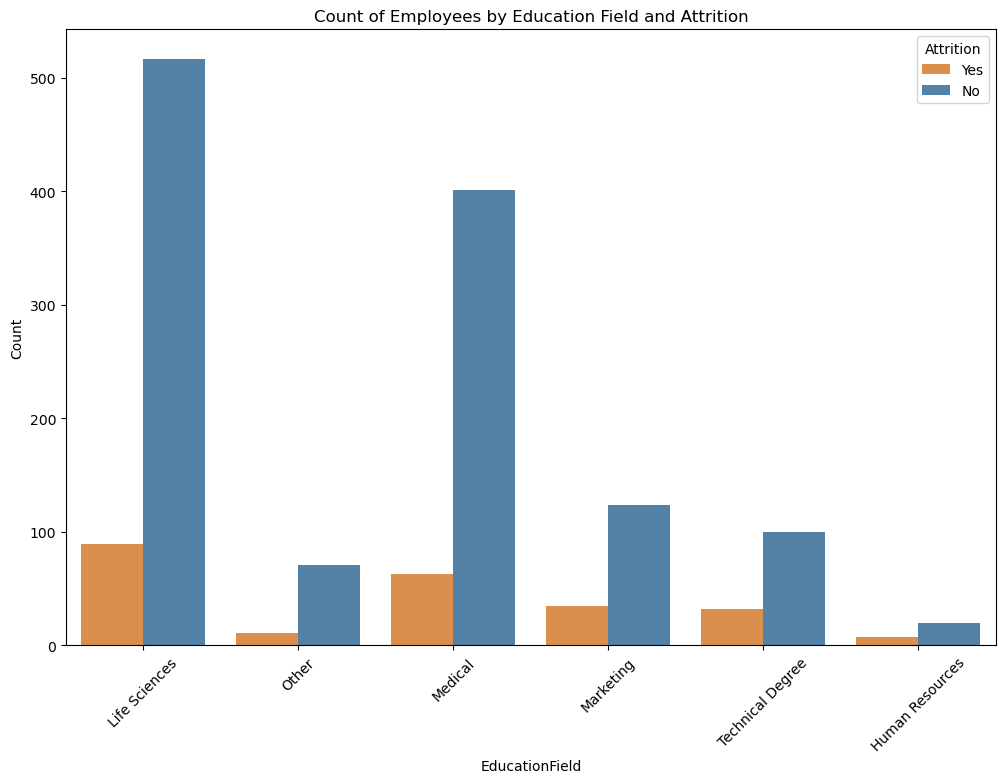

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data=Employeeattrition, x='EducationField',hue='Attrition', palette=["#f28d35", "#4682b4"])
plt.title('Count of Employees by Education Field and Attrition')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['Yes', 'No'])  
plt.xticks(rotation=45)
plt.show()

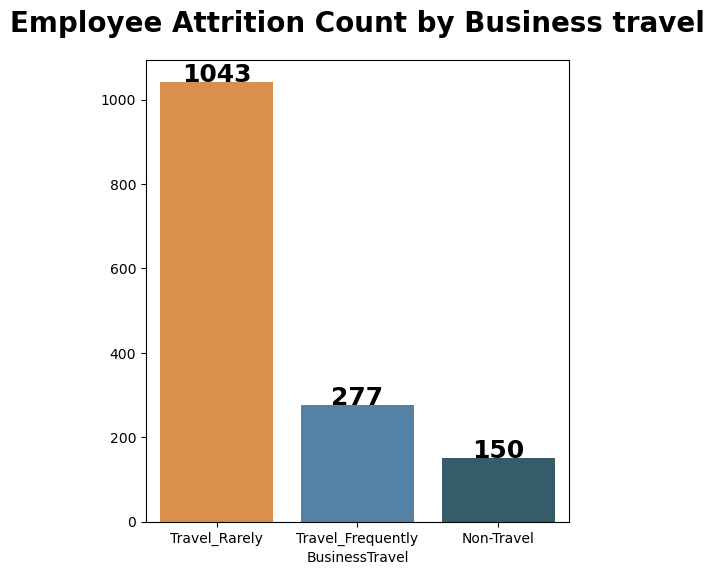

In [20]:
attrition_rate = Employeeattrition['BusinessTravel'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=["#f28d35", "#4682b4", "#2d5f72"])
plt.title("Employee Attrition Count by Business travel", fontweight="black", size=20, pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha="center", fontweight='black', fontsize=18)

plt.show()

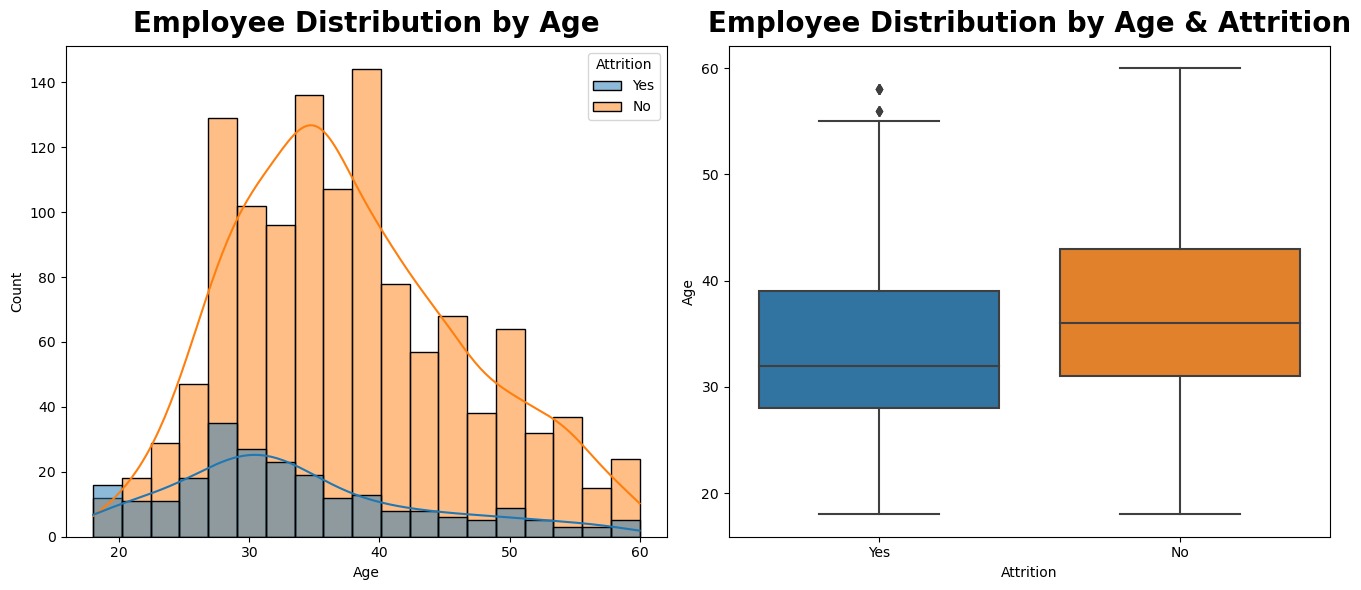

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13.5, 6))

plt.subplot(1, 2, 1)
sns.histplot(x="Age", hue="Attrition", data=Employeeattrition, kde=True, palette=["#1f77b4", "#ff7f0e"]) 
plt.title("Employee Distribution by Age", fontweight="bold", size=20, pad=10)

plt.subplot(1, 2, 2)
sns.boxplot(x="Attrition", y="Age", data=Employeeattrition, palette=["#1f77b4", "#ff7f0e"])  
plt.title("Employee Distribution by Age & Attrition", fontweight="bold", size=20, pad=10)

plt.tight_layout()
plt.show()


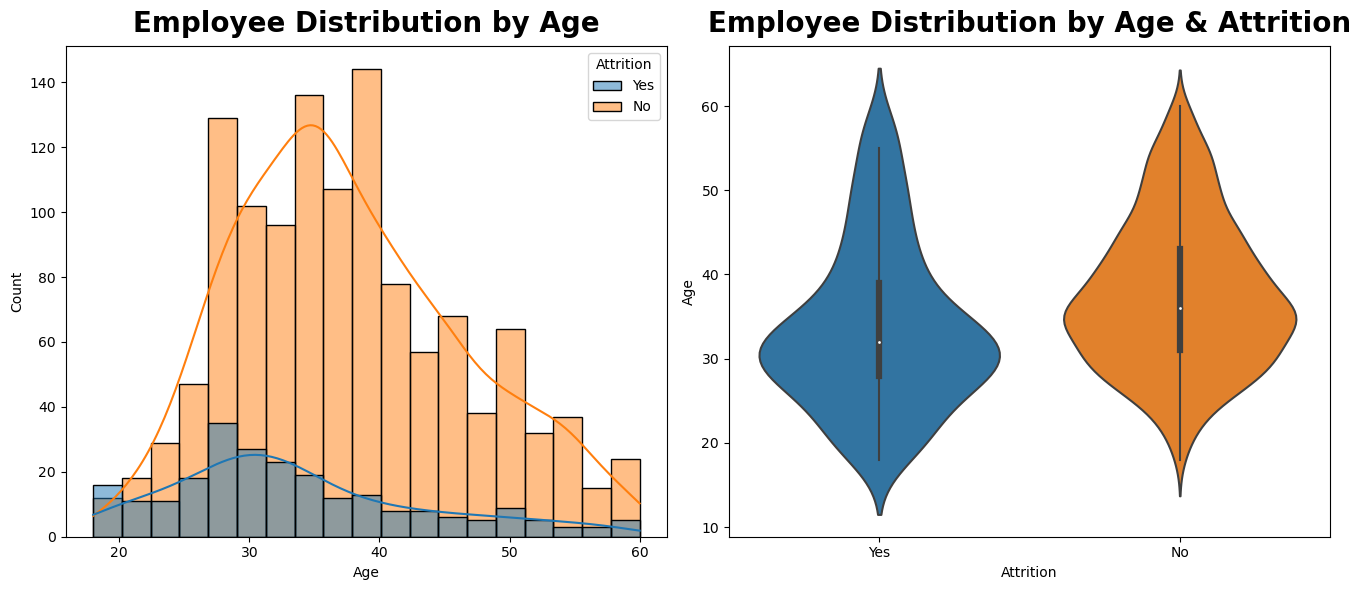

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plots
plt.figure(figsize=(13.5, 6))

# Subplot 1: Histogram for Age Distribution by Attrition
plt.subplot(1, 2, 1)
sns.histplot(x="Age", hue="Attrition", data=Employeeattrition, kde=True, palette=["#1f77b4", "#ff7f0e"])  # Updated colors
plt.title("Employee Distribution by Age", fontweight="bold", size=20, pad=10)

# Subplot 2: Violin plot for Age vs. Attrition
plt.subplot(1, 2, 2)
sns.violinplot(x="Attrition", y="Age", data=Employeeattrition, palette=["#1f77b4", "#ff7f0e"])  # Violin plot with updated colors
plt.title("Employee Distribution by Age & Attrition", fontweight="bold", size=20, pad=10)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [23]:
import plotly.express as px

# Grouping data by Gender, Department, and Attrition and calculating percentages
plot_df = Employeeattrition.groupby(['Gender', 'Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

# Plotting the bar chart with new color mapping
fig = px.bar(plot_df, 
             x="Department", 
             y="Percent", 
             color="Attrition", 
             barmode="group",
             text='Percent', 
             opacity=.75, 
             facet_col="Gender", 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'})  

# Updating trace settings
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), width=.4)

# Updating layout and appearance
fig.update_layout(title_text='Attrition Rates by Department and Gender', 
                  yaxis_ticksuffix='%',
                  paper_bgcolor='#F4F2F0', 
                  plot_bgcolor='#F4F2F0',
                  font_color='#28221D',
                  height=500, 
                  xaxis=dict(tickangle=30))

# Adjusting axes
fig.update_xaxes(showticklabels=True, tickangle=30, col=2)
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

# Show the plot
fig.show()



In [24]:
import plotly.express as px

# Grouping data by WorkLifeBalance, Gender, and Attrition, calculating percentages
plot_df = Employeeattrition.groupby(['WorkLifeBalance', 'Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

# Plotting the bar chart
fig = px.bar(plot_df, 
             x='WorkLifeBalance', 
             y='Percent', 
             color='Attrition',
             facet_row='Gender', 
             text='Percent', 
             opacity=0.75, 
             barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'})  # Updated colors

# Updating trace settings
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))

# Updating layout and appearance
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',
                  height=750, font_color='#28221D',
                  xaxis_title='Work Life Balance', 
                  paper_bgcolor='#F4F2F0', 
                  plot_bgcolor='#F4F2F0',
                  xaxis=dict(tickmode='array', 
                             tickvals=[1, 2, 3, 4],
                             ticktext=['Poor', 'Neutral', 'Good', 'Excellent']))

# Show the plot
fig.show()

In [25]:
import plotly.express as px

# Grouping data by Attrition and JobSatisfaction, calculating percentages
plot_df = Employeeattrition.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('JobSatisfaction')

# Converting JobSatisfaction to categorical and renaming the levels
plot_df.JobSatisfaction = pd.Categorical(plot_df.JobSatisfaction).rename_categories(
    {1: 'Poor', 2: 'Neutral', 3: 'Good', 4: 'Excellent'})

# Plotting the bar chart
fig = px.bar(plot_df, 
             x='JobSatisfaction', 
             y='Percent', 
             text='Percent', 
             opacity=0.8,
             facet_col="Attrition", 
             category_orders={"Attrition": ["Yes", "No"]})

# Updating trace settings with specific colors for the bars
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside',
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],  # Custom colors
                  marker_line=dict(width=1, color='#28221D'))

# Updating layout and appearance
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', 
                  bargap=0.09, 
                  font_color='#28221D',
                  xaxis_title='Job Satisfaction',
                  paper_bgcolor='#F4F2F0', 
                  plot_bgcolor='#F4F2F0')

# Show the plot
fig.show()

# Correlation

In [26]:
Employeeattrition.corr(numeric_only=True)

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  \
Age                       0.509604        -0.004892       0.497855   
DailyRate                 0.002966         0.030571       0.007707   
Dis

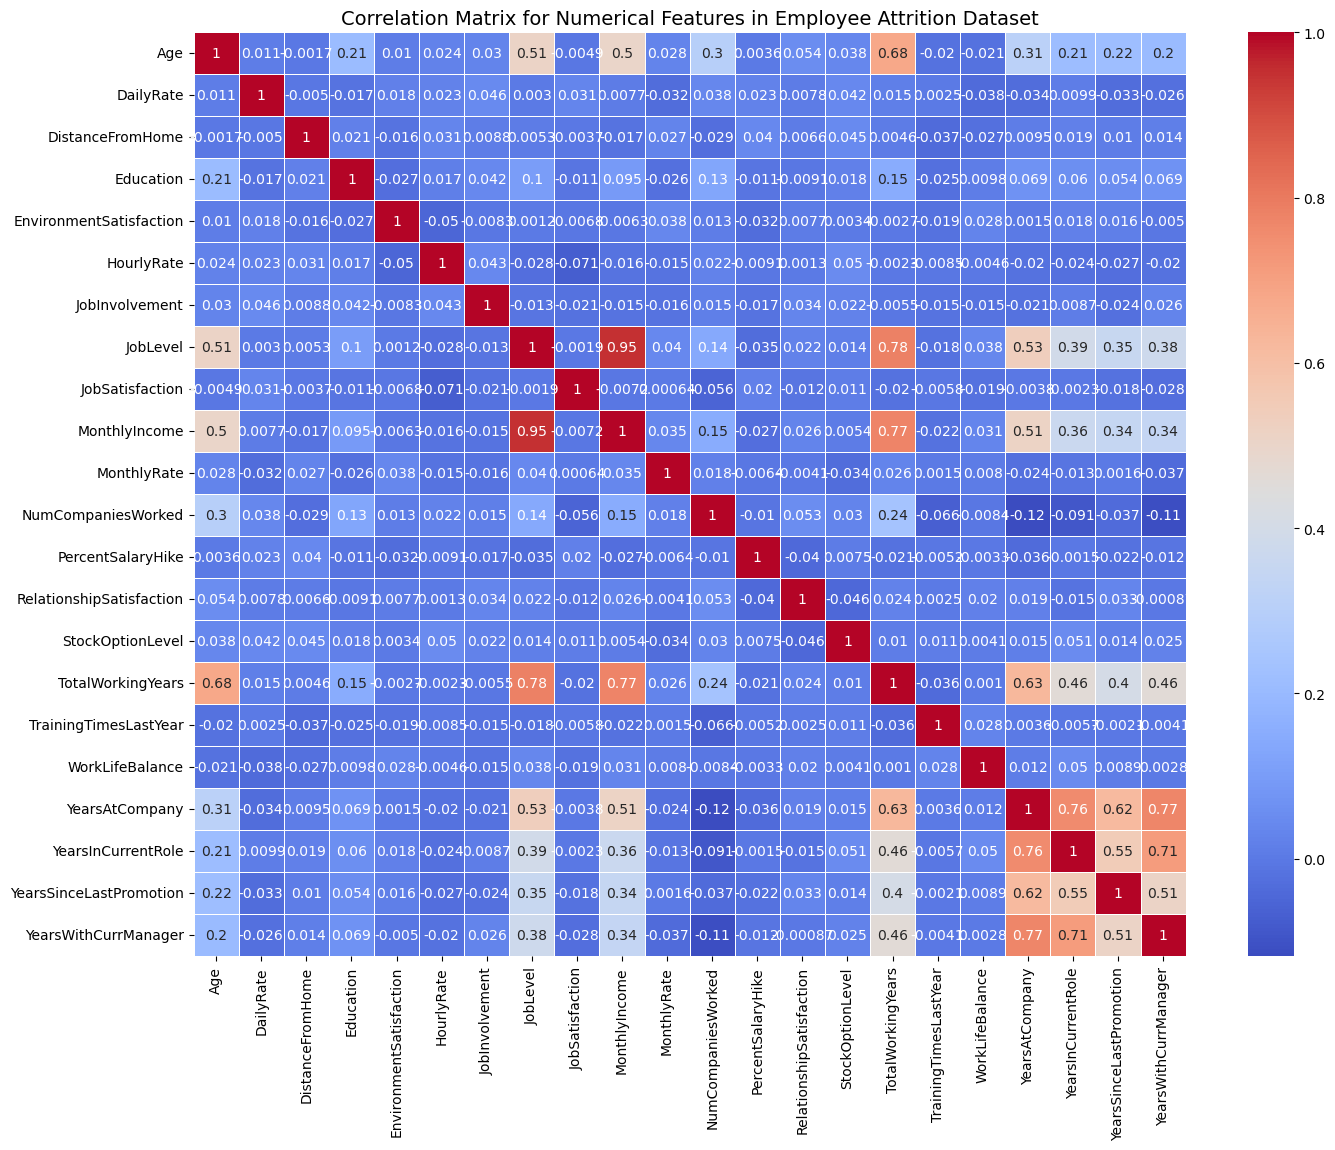

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns that could be relevant for correlation analysis
numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
                'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Computing the correlation matrix
correlation_matrix = Employeeattrition[numeric_cols].corr()

# Plotting the heatmap for visualization
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features in Employee Attrition Dataset', fontsize=14)
plt.show()


# Model Building

# Logistic Regression Model

In [28]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
Employeeattrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [32]:
 Employeeattrition= Employeeattrition.copy()

In [33]:
Employeeattrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
Employeeattrition.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding the target variable (Attrition: Yes/No)
Employeeattrition['Attrition'] = LabelEncoder().fit_transform(Employeeattrition['Attrition'])

features = Employeeattrition.drop(columns=['Attrition'])
features = pd.get_dummies(features)

target = Employeeattrition['Attrition']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print("Logistic Regression Classification Report:\n", logreg_report)

Logistic Regression Accuracy: 0.87
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       380
           1       0.53      0.39      0.45        61

    accuracy                           0.87       441
   macro avg       0.72      0.67      0.69       441
weighted avg       0.85      0.87      0.86       441



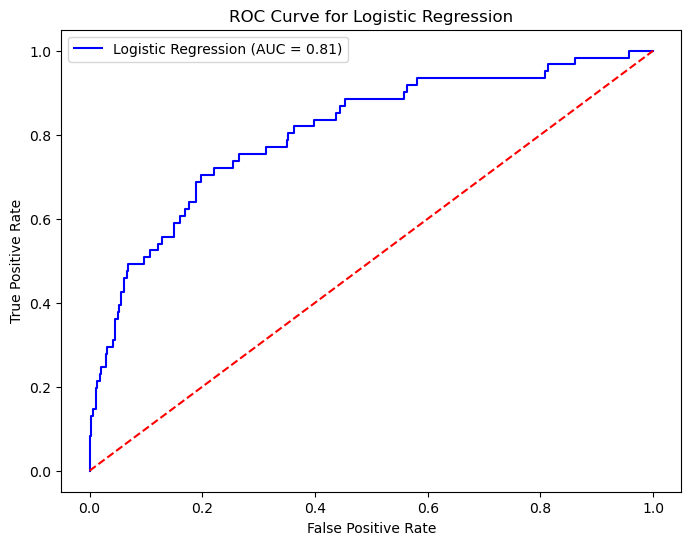

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_logreg)
auc = roc_auc_score(y_test, y_probs_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [37]:
import numpy as np
feature_importance = abs(logreg.coef_[0])

feature_names = features.columns
importance_Employeeattrition = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

importance_Employeeattrition = importance_Employeeattrition.sort_values(by='Importance', ascending=False)

print(importance_Employeeattrition)

                              Feature  Importance
19                  TotalWorkingYears    0.713219
23                 YearsInCurrentRole    0.690007
22                     YearsAtCompany    0.658077
13                 NumCompaniesWorked    0.598574
54                       OverTime_Yes    0.478634
53                        OverTime_No    0.478634
24            YearsSinceLastPromotion    0.475798
45          JobRole_Research Director    0.453830
6             EnvironmentSatisfaction    0.438148
10                    JobSatisfaction    0.431155
51               MaritalStatus_Single    0.406781
40  JobRole_Healthcare Representative    0.391747
26          BusinessTravel_Non-Travel    0.368418
8                      JobInvolvement    0.356437
41            JobRole_Human Resources    0.351465
42      JobRole_Laboratory Technician    0.340664
25               YearsWithCurrManager    0.332155
2                    DistanceFromHome    0.330931
49             MaritalStatus_Divorced    0.325441


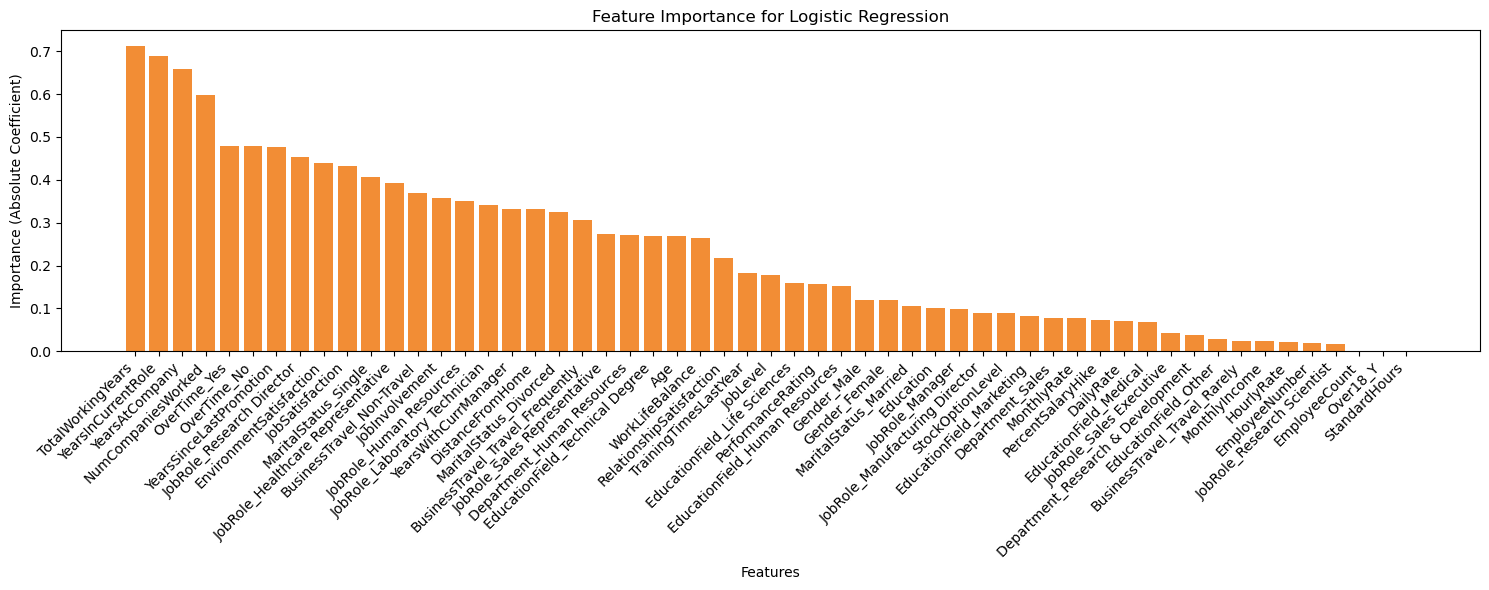

In [38]:
# Feature importance based on Logistic Regression coefficients
feature_importance = pd.Series(abs(logreg.coef_[0]), index=features.columns)  # Taking absolute values of coefficients
sorted_importance = feature_importance.sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(15, 6))
plt.bar(sorted_importance.index, sorted_importance.values, color='#f28d35')  # Changed the color to orange
plt.title('Feature Importance for Logistic Regression')
plt.ylabel('Importance (Absolute Coefficient)')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

# Prediction on the test set
y_pred = rfc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8707482993197279
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



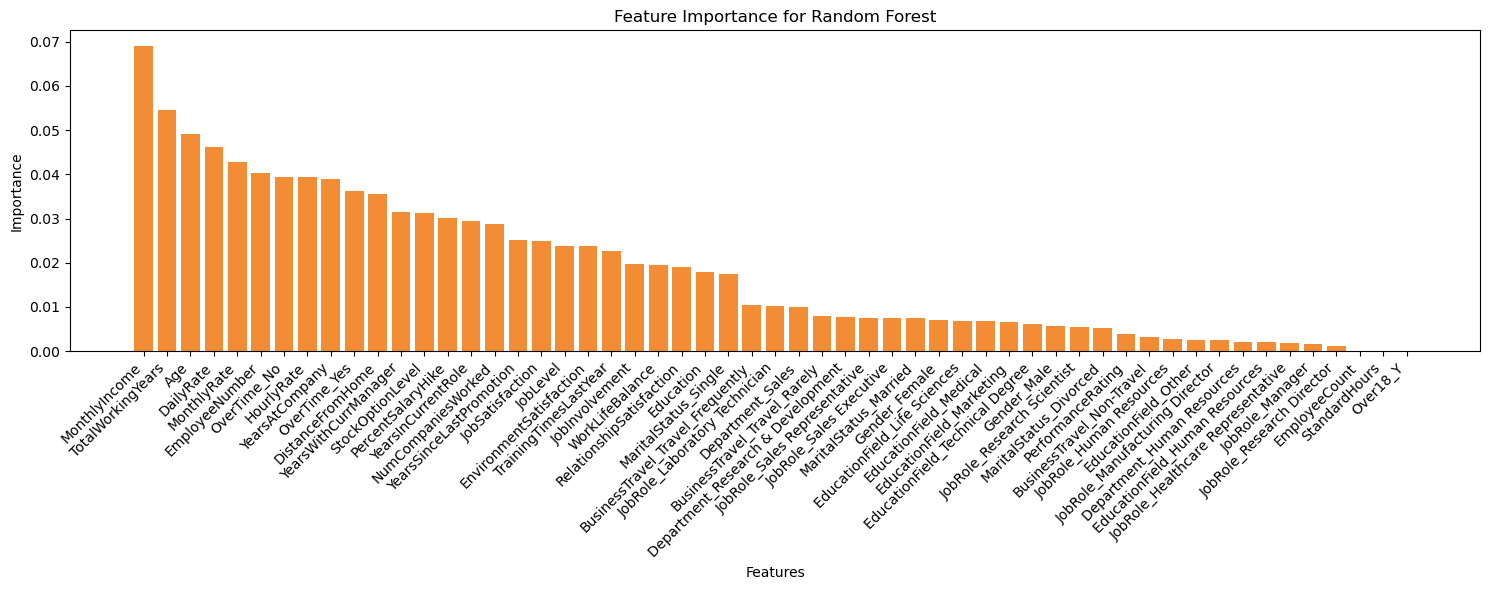

In [41]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns)
sorted_importance = feature_importance.sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(15, 6))
plt.bar(sorted_importance.index, sorted_importance.values, color='#f28d35')  # Using the orange color you prefer
plt.title('Feature Importance for Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gradient Boosting Model

In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode the target variable (Attrition: Yes/No)
Employeeattrition['Attrition'] = LabelEncoder().fit_transform(Employeeattrition['Attrition'])

features = Employeeattrition.drop(columns=['Attrition'])
features = pd.get_dummies(features)

target = Employeeattrition['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)


y_pred = gbc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294



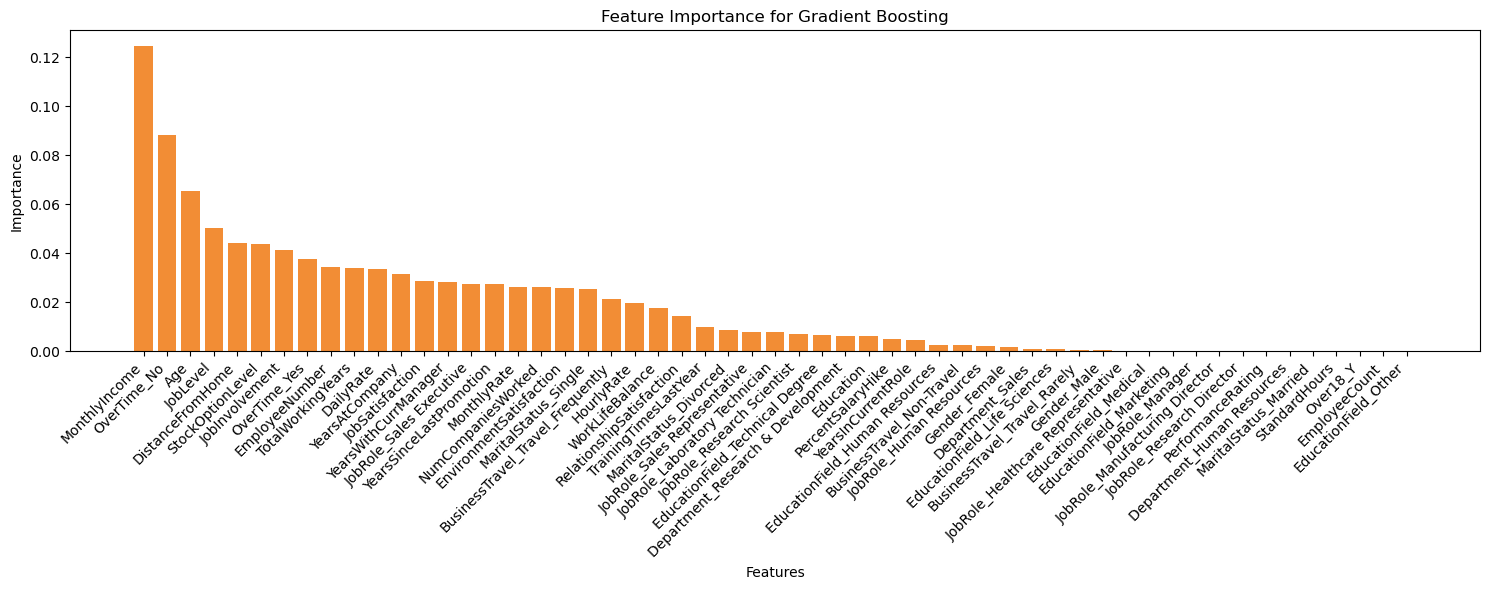

In [44]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.Series(gbc.feature_importances_, index=X_train.columns)
sorted_importance = feature_importance.sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(15, 6))
plt.bar(sorted_importance.index, sorted_importance.values, color='#f28d35')  # Using the orange color you prefer
plt.title('Feature Importance for Gradient Boosting')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Predicting the Average Number of Years Employees Stay at A company

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Employeeattrition['Attrition'] = LabelEncoder().fit_transform(Employeeattrition['Attrition'])

features = Employeeattrition.drop(columns=['YearsAtCompany'])
features = pd.get_dummies(features)

target = Employeeattrition['YearsAtCompany']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

average_years = y_pred.mean()
print(f'Average Years at Company (Predicted): {average_years:.2f}')


Mean Absolute Error: 0.9694071614421955
Mean Squared Error: 2.754490051740384
Root Mean Squared Error: 1.6596656445622968
Average Years at Company (Predicted): 7.29


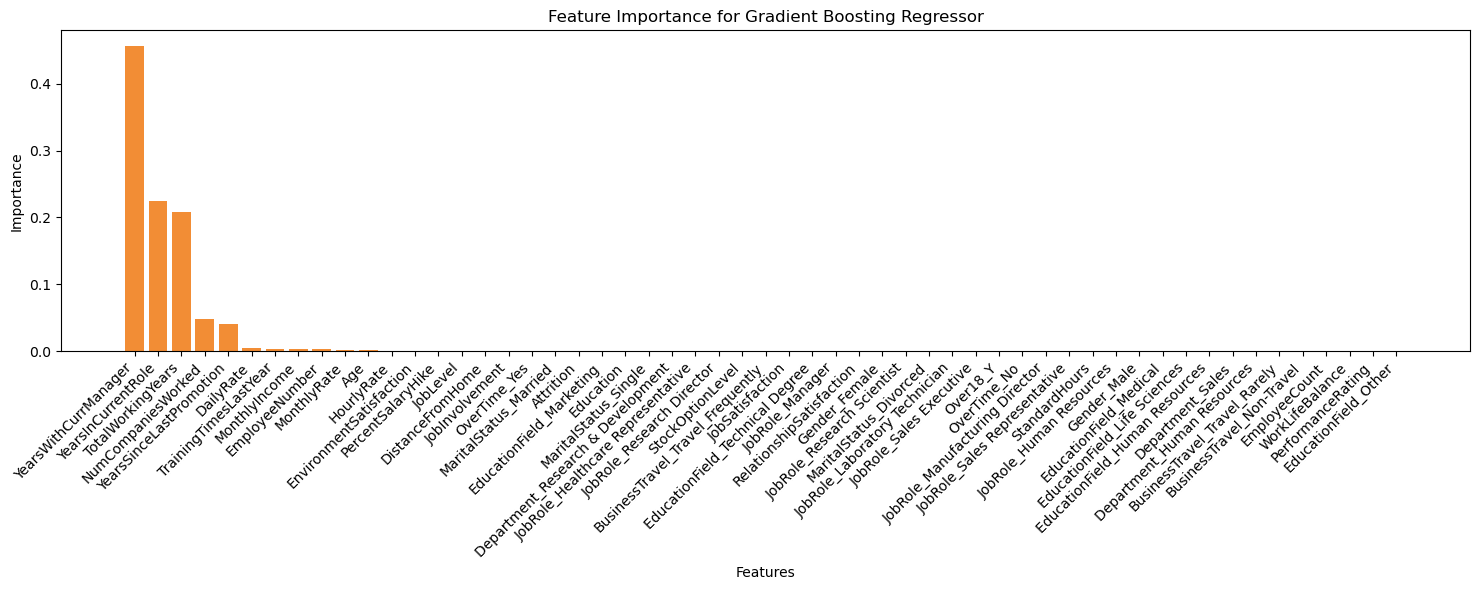

In [46]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.Series(gbr.feature_importances_, index=X_train.columns)
sorted_importance = feature_importance.sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(15, 6))
plt.bar(sorted_importance.index, sorted_importance.values, color='#f28d35')  # Using the orange color you prefer
plt.title('Feature Importance for Gradient Boosting Regressor')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion

This analysis aimed to predict employee attrition and understand the key factors contributing to it, using three models. That is, Logistic Regression, Random Forest, and Gradient Boosting. Based on the analysis of the employee dataset used, several important conclusions were drawn;

Based on precision, recall, and overall accuracy, the Gradient Boosting model is the best choice for predicting employee attrition with 88% accuracy as compared to the other two models. It provides a good balance between employees who are likely to stay and those at risk of leaving, making it a valuable tool for the HR department to implement proactive retention strategies. It placed importance on features such as monthly income, overtime, and age, which can be used by HR departments to prioritize employee retention strategies. The feature importance plots revealed that compensation, work-life balance, and job tenure are critical drivers of employee satisfaction and retention.

The predicted average number of years an employee stays at the company is approximately 7.29(7) years. This provides insight into the overall tenure and retention trends within the organization. Improving factors such as compensation, career progression, and work-life balance could help extend employee tenure further.